### IMPORTATIONS

In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv('creditcard_2023.csv')

In [70]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### DATA PRE-PROCESSING

In [71]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [73]:
fraud_count = np.sum(df['Class']==1)

In [74]:
print(fraud_count)

284315


In [ ]:
X = df.drop(['Class'], axis=1)
X = X.drop(columns=['id'])
y = df['Class']


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### MODEL BUILDING, HYPERPARAMETER TUNING AND TRAINING

In [80]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
fraud_weight = len(y) / (2 * Counter(y)[1])
model = xgb.XGBClassifier(scale_pos_weight=fraud_weight,reg_alpha=0.5, reg_lambda=5, max_depth=3, min_child_weights=5, subsample=0.7, colsample_bytree=0.7, use_label_encoder=False, eval_metric='logloss')

In [81]:
model.fit(X_train, y_train)

c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weights", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, min_child_weights=5,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

### MODEL METRICS

In [82]:
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.62%


In [84]:
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score
print(f"Log Loss: {log_loss(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Log Loss: 0.1386058692134949
F1 Score: 0.9961649089165868
Precision Score: 0.9948969463420331
Recall Score: 0.9974361075664095


In [85]:
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train Scores:")
print("Log Loss:", log_loss(y_train, model.predict_proba(X_train)))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))

print("\nTest Scores:")
print("Log Loss:", log_loss(y_test, model.predict_proba(X_test)))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))


Train Scores:
Log Loss: 0.02016755687223062
F1 Score: 0.9963273042212153
Precision: 0.9949560534878941
Recall: 0.9977023398928094

Test Scores:
Log Loss: 0.020681238355967167
F1 Score: 0.9961649089165868
Precision: 0.9948969463420331
Recall: 0.9974361075664095


In [86]:
from sklearn.metrics import roc_auc_score
y_test_probs =  model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_probs)
print(f"AUC: {auc}")

AUC: 0.9998431483086448


In [87]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print(f"AUC Scores: {auc_scores}")

c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weights", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weights", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weights", "use_label_encoder" } are not used.

  warnings.w

AUC Scores: [0.99982816 0.9998771  0.99986739 0.99984993 0.99983798]


### VISUALIZATIONS

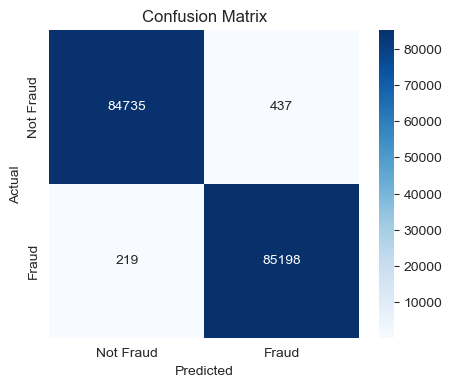

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


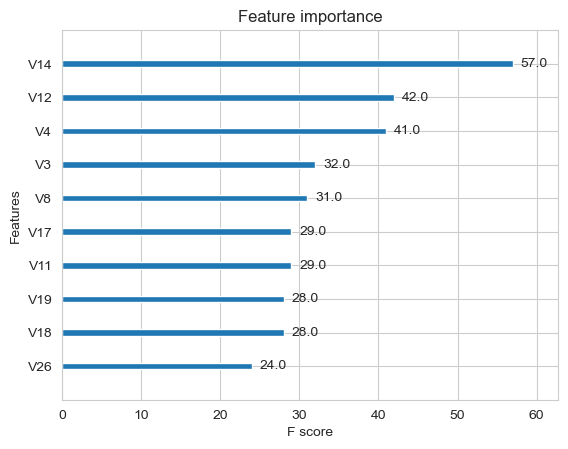

In [89]:
xgb.plot_importance(model, max_num_features=10)
plt.show()


In [90]:
import joblib
joblib.dump(model, 'creditcard_model.pkl')

['creditcard_model.pkl']